### Loading the dataset

In [1]:
from nltk.corpus import reuters

In [2]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to C:\Users\Nichelle
[nltk_data]     Machado\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [107]:
reuters.fileids()[:10]

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843']

In [4]:
cats = reuters.categories()
print("Reuters has %d categories:\n%s" % (len(cats), cats))

Reuters has 90 categories:
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [5]:
total = len(reuters.paras())
total_multi = 0
for c in cats:
    lc = len(reuters.paras(categories=[c]))
    total_multi += lc
    print("%s ---- %d documents out of %d" % (c, lc, total))
print("Articles belong to %.4f categories on average" % ((total_multi * 1.0) / total))
print("There are %.4f articles per category on average" % ((total * 1.0) / len(cats)))

acq ---- 2661 documents out of 11887
alum ---- 62 documents out of 11887
barley ---- 58 documents out of 11887
bop ---- 120 documents out of 11887
carcass ---- 69 documents out of 11887
castor-oil ---- 2 documents out of 11887
cocoa ---- 81 documents out of 11887
coconut ---- 6 documents out of 11887
coconut-oil ---- 7 documents out of 11887
coffee ---- 141 documents out of 11887
copper ---- 73 documents out of 11887
copra-cake ---- 3 documents out of 11887
corn ---- 270 documents out of 11887
cotton ---- 65 documents out of 11887
cotton-oil ---- 3 documents out of 11887
cpi ---- 108 documents out of 11887
cpu ---- 6 documents out of 11887
crude ---- 658 documents out of 11887
dfl ---- 3 documents out of 11887
dlr ---- 223 documents out of 11887
dmk ---- 15 documents out of 11887
earn ---- 4211 documents out of 11887
fuel ---- 23 documents out of 11887
gas ---- 65 documents out of 11887
gnp ---- 146 documents out of 11887
gold ---- 131 documents out of 11887
grain ---- 640 documents ou

### Combining all the documents in each category

#### Income

In [63]:
# def combine(category_name):
#     c = reuters.fileids(categories=['category_name'])
#     l = []
#     for article in c:
#         st = reuters.words(c)
#         str_all=" "
#         l.append(str_all.join(st))
#     return ''.join(l)


In [64]:
# income1 = combine('jobs')

In [65]:
# income1

''

In [80]:
c1 = reuters.fileids(categories=['income'])

In [81]:
l1 = []
for art in c1:
    st1 = reuters.words(c1)
    str_all=" "
    l1.append(str_all.join(st1))

In [83]:
income = ''.join(l1)

In [1]:
#income

#### Jobs

In [86]:
c2 = reuters.fileids(categories=['jobs'])

In [87]:
l2 = []
for art in c2:
    st2 = reuters.words(c2)
    str_all=" "
    l2.append(str_all.join(st2))

In [88]:
jobs=''.join(l2)

#### CPI

In [89]:
c3 = reuters.fileids(categories=['cpi'])

In [90]:
l3 = []
for art in c3:
    st3 = reuters.words(c3)
    str_all=" "
    l3.append(str_all.join(st3))

In [92]:
cpi=''.join(l3)

### Preprocessing

In [108]:
import re

# Code to remove special characters
def prep(string):
    string = string.replace("'", "") #apostrophe
    string = string.replace('"',"") #double quotes
    #string = string.replace(",","") #comma
    string = string.replace(" . ", ".") #removing space between '.'
    string = string.replace(" / ", "/") #removing space between '/'
    string = re.sub('\s+[a-zA-Z]\s+', ' ',string) #removing single alphabetical characters
    string = re.sub("pct|PCT", "%", string) #replacing 'pct' with the symbol '%'
    string = string.replace("dlrs","dlr")
    string = string.replace("mln", "million")
    string = string.replace("U.S.", "United States of America ")
    return string

prep_income = prep(income)
prep_jobs = prep(jobs)
prep_cpi = prep(cpi)


In [2]:
#prep_income

In [23]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')

In [24]:
# stop_words = stopwords.words('english')

# def remove_stopwords(text):
#     text = ' '.join(word for word in text.split(' ') if word not in stop_words)
#     return text
    
# string = remove_stopwords(string)


explore different spacy library for scientific literature

### Visualization of the document

In [110]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [111]:
def freq_words(category):
    plt.figure(figsize = (20,20)) 
    wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(category)
    return plt.imshow(wc , interpolation = 'bilinear')

#### Income

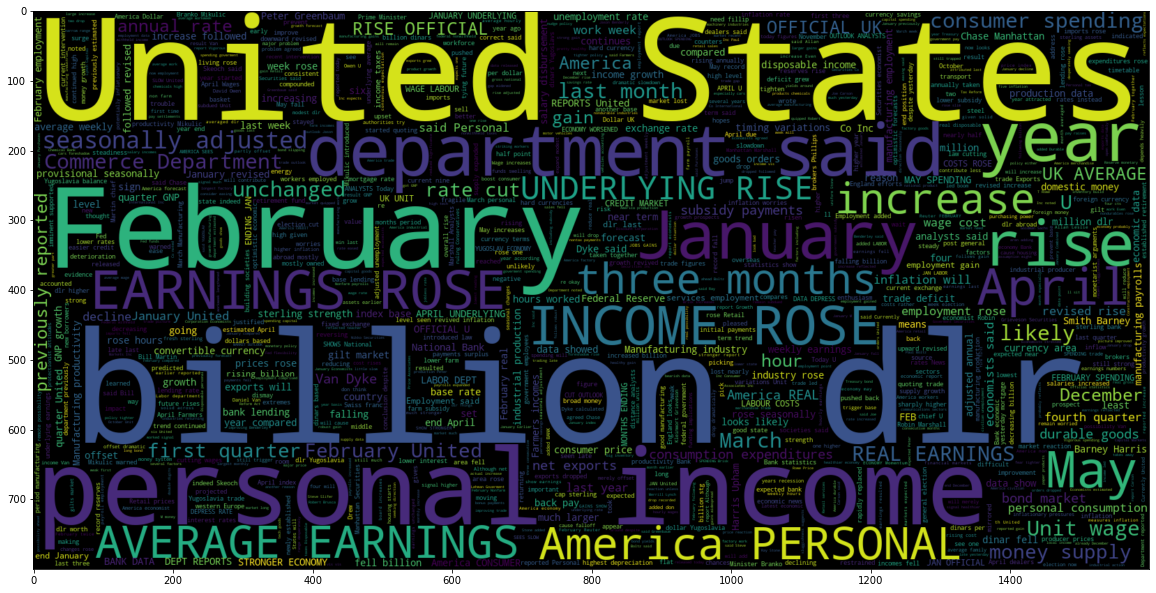

In [112]:
img_income = freq_words(prep_income)

#### Jobs

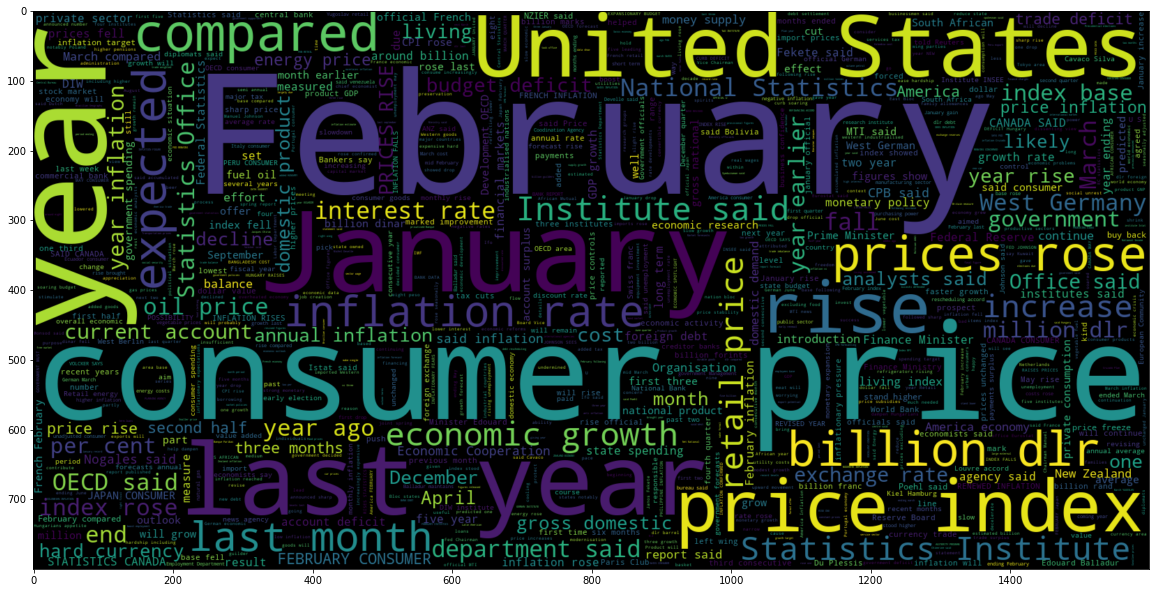

In [113]:
img_jobs = freq_words(prep_jobs)

#### CPI

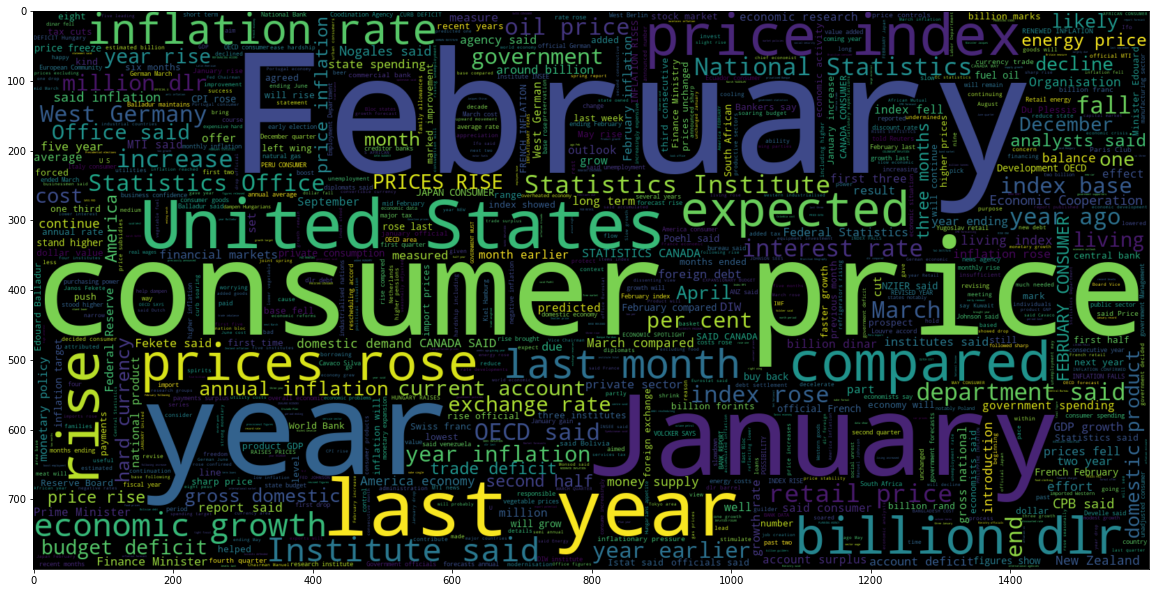

In [114]:
img_cpi = freq_words(prep_cpi)